In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

sys.path.append('..')
from audio import AudioProcessor, plot_spectrogram

%matplotlib inline

ModuleNotFoundError: No module named 'audio'

In [24]:
ap = AudioProcessor()

AudioProcessor
  sample_rate:22050
  num_mels:80
  num_freq:1025
  frame_length_ms:50
  frame_shift_ms:12.5
  preemphasis:0.98
  min_level_db:-100
  ref_level_db:20
  power:1.5
  mel_fmin:0.0
  mel_fmax:8000.0
  griffin_lim_iters:60
  n_fft:2048
  hop_length:275
  win_length:1100


## Load and save wavfile

In [25]:
wav_path = '../data/LJSpeech-1.1/wavs/LJ001-0001.wav'

In [26]:
y = ap.load_wav(wav_path)

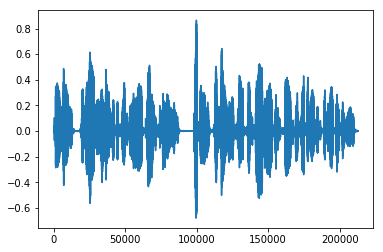

In [27]:
plt.plot(y);

In [28]:
IPython.display.Audio(y, rate=22050)

In [29]:
ap.save_wav(y, 'sample.wav')

In [30]:
IPython.display.Audio(filename='sample.wav')

## Preemphasis

In [31]:
y_preemphasis = ap.apply_preemphasis(y)

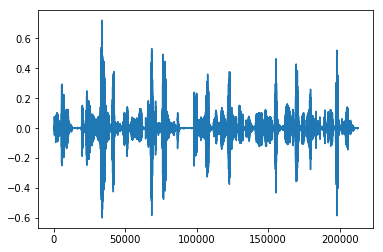

In [32]:
plt.plot(y_preemphasis);

In [33]:
IPython.display.Audio(y_preemphasis, rate=22050)

In [34]:
y = ap.apply_inv_preemphasis(y_preemphasis)

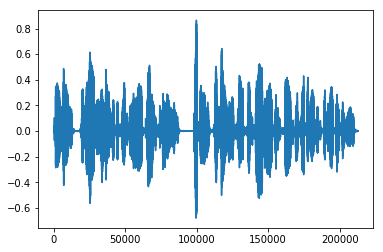

In [35]:
plt.plot(y);

In [36]:
IPython.display.Audio(y, rate=22050)

## Spectrogram

(1025, 775) -4.0 4.0


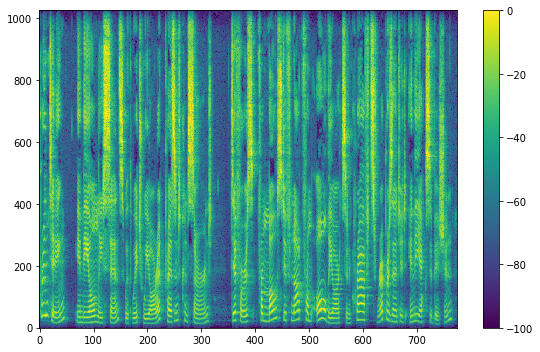

In [37]:
spec = ap.spectrogram(y)
print(spec.shape, np.min(spec), np.max(spec))
plot_spectrogram(spec.T, ap);

## Melspectrogram

(80, 775) -4.0 2.6413127109367096


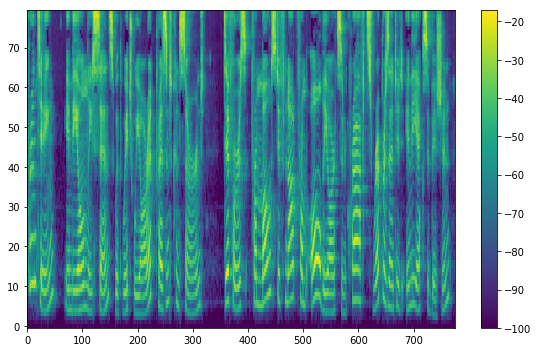

In [38]:
mel = ap.melspectrogram(y)
print(mel.shape, np.min(mel), np.max(mel))
plot_spectrogram(mel.T, ap);

## Re-synthesis by Griffin-Lim

In [42]:
wav_gen_from_spec = ap.inv_spectrogram(spec)

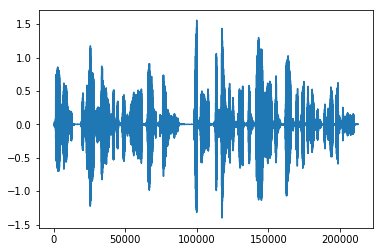

In [44]:
plt.plot(wav_gen_from_spec);

In [45]:
IPython.display.Audio(wav_gen_from_spec, rate=22050)

In [48]:
wav_gen_from_mel = ap.inv_melspectrogram(mel)

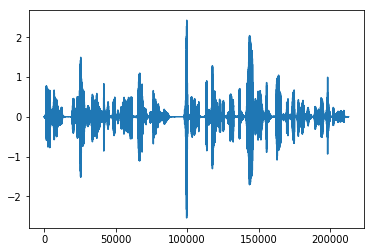

In [50]:
plt.plot(wav_gen_from_mel);

In [51]:
IPython.display.Audio(wav_gen_from_mel, rate=22050)